# <center>Recurrent Neural Networks</center>
## <center>Inclass Project 3 - MA4144</center>

This project contains 10 tasks/questions to be completed, some require written answers. Open a markdown cell below the respective question that require written answers and provide (type) your answers. Questions that required written answers are given in blue fonts. Almost all written questions are open ended, they do not have a correct or wrong answer. You are free to give your opinions, but please provide related answers within the context.

After finishing project run the entire notebook once and **save the notebook as a pdf** (File menu -> Save and Export Notebook As -> PDF). You are **required to upload this PDF on moodle**.

***

## Outline of the project

The aim of the project is to build a RNN model to suggest autocompletion of half typed words. You may have seen this in many day today applications; typing an email, a text message etc. For example, suppose you type in the four letter "univ", the application may suggest you to autocomplete it by "university".

![Autocomplete](https://d33v4339jhl8k0.cloudfront.net/docs/assets/5c12e83004286304a71d5b72/images/66d0cb106eb51e63b8f9fbc6/file-gBQe016VYt.gif)

We will train a RNN to suggest possible autocompletes given $3$ - $4$ starting letters. That is if we input a string "univ" hopefully we expect to see an output like "university", "universal" etc.

For this we will use a text file (wordlist.txt) containing 10,000 common English words (you'll find the file on the moodle link). The list of words will be the "**vocabulary**" for our model.

We will use the Python **torch library** to implement our autocomplete model.

***


Use the below cell to use any include any imports

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import random

## Section 1: Preparing the vocabulary

In [18]:
WORD_SIZE = 13

**Q1.** In the following cell provide code to load the text file (each word is in a newline), then extract the words (in lowercase) into a list.

For practical reasons of training the model we will only use words that are longer that $3$ letters and that have a maximum length of WORD_SIZE (this will be a constant we set at the beginning - you can change this and experiment with different WORD_SIZEs). As seen above it is set to $13$.

So out of the extracted list of words filter out those words that match our criteria on word length.

To train our model it is convenient to have words/strings of equal length. We will choose to convert every word to length of WORD_SIZE, by adding underscores to the end of the word if it is initially shorter than WORD_SIZE. For example, we will convert the word "university" (word length 10) into "university___" (wordlength 13). In your code include this conversion as well.

Store the processed WORD_SIZE lengthed strings in a list called vocab.

In [19]:
#TODO

with open('wordlist.txt', 'r') as file:
    words = file.read().splitlines()

vocab = []
for word in words:
    if 3 < len(word) <= WORD_SIZE:
        word = word.ljust(WORD_SIZE, '_')
        vocab.append(word.lower())

print(vocab[:10])

['aaron________', 'abandoned____', 'aberdeen_____', 'abilities____', 'ability______', 'able_________', 'aboriginal___', 'abortion_____', 'about________', 'above________']


<font color='blue'>In the above explanation it was mentioned "for practical reasons of training the model we will only use words that are longer that $3$ letters and that have a certain maximum length". In your opinion what could be those practical? Will hit help to build a better model?</font>

**Answer** 

### <span style="color: darkblue;">Practical Reasons for Limiting Word Length</span>

1. <span style="color: darkblue;">**Focus on Informative Words**</span>: Very short words (like "an" or "is") don't provide much useful information for training, and they're not as valuable for autocomplete suggestions. By filtering out words shorter than 3 letters, the model can focus on longer, more complex words that offer better learning opportunities and more meaningful predictions.

2. <span style="color: darkblue;">**Consistent Input Length**</span>: By setting a maximum word length and padding shorter words, we ensure that all input sequences are the same length. This consistency makes it easier for the RNN to process the data without dealing with variable-length inputs, improving its efficiency and simplifying the training process.

3. <span style="color: darkblue;">**Efficiency in Training and Memory Use**</span>: Limiting the word length helps reduce memory consumption and computational overhead. The model will train faster because it doesn't need to process unnecessarily long sequences, and it avoids the complications that come with managing very long inputs, like potential issues with retaining information.

4. <span style="color: darkblue;">**Better Autocompletion Suggestions**</span>: Autocomplete features are most useful for longer words, where users may need help completing a partially typed input (e.g., "univ" to "university"). Short words are often easy to type out, so focusing on longer words ensures that the model is providing meaningful and practical suggestions that improve user experience.


**Q2** To input words into the model, we will need to convert each letter/character into a number. as we have seen above, the only characters in our list vocab will be the underscore and lowercase english letters. so we will convert these $27$ characters into numbers as follows: underscore -> $0$, 'a' -> $1$, 'b' -> $2$, $\cdots$, 'z' -> $26$. In the following cell,

(i) Implement a method called char_to_num, that takes in a valid character and outputs its numerical assignment.

(ii) Implement a method called num_to_char, that takes in a valid number from $0$ to $26$ and outputs the corresponding character.

(iii) Implement a method called word_to_numlist, that takes in a word from our vocabulary and outputs a (torch) tensor of numbers that corresponds to each character in the word in that order. For example: the word "united_______" will be converted to tensor([21, 14,  9, 20,  5,  4,  0,  0,  0,  0,  0,  0,  0]). You are encouraged to use your char_to_num method for this.

(iv) Implement a method called numlist_to_word, that does the opposite of the above described word_to_numlist, given a tensor of numbers from $0$ to $26$, outputs the corresponding word. You are encouraged to use your  num_to_char method for this.

Note: As mentioned since we are using the torch library we will be using tensors instead of the usual python lists or numpy arrays. Tensors are the list equivalent in torch. Torch models only accept tensors as input and they output tensors.

In [20]:
def char_to_num(char):
    if char == '_':
        return 0
    else:
        return ord(char) - ord('a') + 1
     
def num_to_char(num):
    if num == 0:
        return '_'
    else:
        return chr(num + ord('a') - 1)

def word_to_numlist(word):
    nums = [char_to_num(char) for char in word]
    return(torch.tensor(nums, dtype=torch.int))


def numlist_to_word(numlist):
    word = ''.join(num_to_char(num.item()) for num in numlist)
    return(word)


<font color='blue'>We convert letter into just numbers based on their aphabetical order, I claim that it is a very bad way to encode data such as letters to be fed into learning models, please write your explanation to or against my claim. If you are searching for reasons, the keyword 'categorical data' may be useful. Although the letters in our case are not treated as categorical data, the same reasons as for categorical data is applicable. Even if my claim is valid, at the end it won't matter due to something called "embedding layers" that we will use in our model. What is an embedding layer? What is it's purpose? Explain.</font>

**Answer** 

<span style="color:darkblue;">
Your claim is valid. 
    
**Explanation:**

1. **Bad Encoding for Learning Models**: Assigning numbers based on the alphabetical order (i.e., 'a' = 1, 'b' = 2, etc.) assumes that there is some inherent numerical relationship between the letters, which is not true. For example, this approach implies that the difference between 'a' and 'b' (1 and 2) is the same as the difference between 'y' and 'z' (25 and 26), which is misleading. Letters should be treated as distinct categories rather than ordered values.

2. **Categorical Data Consideration**: Letters are more akin to categorical data, where the order doesn't convey any meaningful information. When dealing with categorical data, it's generally a poor practice to assign numeric values directly, as the model might assume a false relationship between categories. The better approach is to use methods like one-hot encoding or embeddings, where categories are represented in a way that doesn't imply any rank or relationship.

**An embedding layer** maps each input  into a dense vector of real numbers, where the dimensions of the vector capture different attributes or characteristics of the input. These embeddings are learned during training, allowing the model to develop meaningful representations of letters, rather than relying on their numeric order.

**Purpose of Embedding Layers**: The purpose of an embedding layer is to capture semantic relationships between different inputs. It transforms high-dimensional categorical data into low-dimensional continuous vectors, where similar inputs will have similar representations. This helps the model learn patterns in the data more effectively. In our case, even though we encode letters using numbers, the embedding layer will learn to ignore the numerical order and instead learn meaningful relationships based on the context of the letters in the words.
</span>

## Section 2: Implementing the Autocomplete model

We will implement a RNN model based on LSTM. The [video tutorial](https://www.youtube.com/watch?v=tL5puCeDr-o) will be useful. Our model will be only one hidden layer, but feel free to sophisticate with more layers after the project for your own experiments.

Our model will contain all the training and prediction methods as single package in a class (autocompleteModel) we will define and implement below.

In [21]:
LEARNING_RATE = 0.005

In [28]:
class autocompleteModel(nn.Module):

    def __init__(self, alphabet_size, embed_dim, hidden_size, num_layers):
        super().__init__()

        self.alphabet_size = alphabet_size
        self.embed_dim = embed_dim
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.embedding = nn.Embedding(alphabet_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, alphabet_size)


    def forward(self, character, hidden_state, cell_state):

        embedded = self.embedding(character)
        lstm_out, (hidden_state, cell_state) = self.lstm(embedded.unsqueeze(0), (hidden_state, cell_state))
        output = self.fc(lstm_out)
        return output, hidden_state, cell_state


    def initial_state(self):

        h0 = torch.zeros(self.num_layers, 1, self.hidden_size)
        c0 = torch.zeros(self.num_layers, 1, self.hidden_size)
        return (h0, c0)

    def trainModel(self, vocab, epochs = 5, batch_size = 100):

        self.train()
        optimizer = optim.Adam(self.parameters(), lr = LEARNING_RATE)
        loss_log = []
        criterion = nn.CrossEntropyLoss()

        for e in range(epochs):
            random.shuffle(vocab)
            total_loss = 0
            num_iter = len(vocab) // batch_size
            for i in range(num_iter):
                batch_loss = 0
                optimizer.zero_grad()

                vocab_batch = vocab[i * batch_size:(i+1) * batch_size]

                for word in vocab_batch:
                    hidden_state, cell_state = self.initial_state()
                    inputs = torch.tensor([char_to_num(char) for char in word[:-1]])
                    targets = torch.tensor([char_to_num(char) for char in word[1:]])
                    
                    for c in range(WORD_SIZE - 1):
                        output, hidden_state, cell_state = self.forward(inputs[c].unsqueeze(0), hidden_state=hidden_state, cell_state=cell_state)
                        loss = criterion(output.squeeze(0), targets[c].unsqueeze(0))
                        batch_loss += loss

                batch_loss /= batch_size
                batch_loss.backward()
                optimizer.step()
                total_loss += batch_loss.item()
                loss_log.append(batch_loss.item())

            print(f"Epoch: {e+1}, loss: {total_loss/num_iter}")

        plt.figure(figsize=(10, 5))
        plt.plot(loss_log, label='Training Loss')
        plt.title('Loss Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

    def autocomplete(self, sample):
        
        self.eval()
        completed_list = []

        for literal in sample:
            hidden_state, cell_state = self.initial_state()
            input_tensor = torch.tensor([char_to_num(char) for char in literal])

            for c in input_tensor:
                output, hidden_state, cell_state = self.forward(c.unsqueeze(0), hidden_state, cell_state)

            completed_word = literal
            
            for _ in range(WORD_SIZE - len(literal)):
                probs = nn.functional.softmax(output.squeeze(0), dim=1)
                next_char = torch.multinomial(probs, 1).item()
                completed_word += num_to_char(next_char)
                output, hidden_state, cell_state = self.forward(torch.tensor([next_char]), hidden_state, cell_state)
            completed_list.append(completed_word)

        return completed_list

## Section 3: Using and evaluating the model

(i) Feel free to initialize a autocompleteModel using different embedding dimensions and hidden layer sizes. Use different learning rates, epochs, batch sizes. Train the best model you can. Show the loss curves in you answers.

(ii) Evaluate it on different samples of partially filled in words. Eg: ["univ", "math", "neur", "engin"] etc. Please show outputs for different samples.

<font color='blue'>Comment on the results. Is it successful? Do you see familiar substrings in the generated tesxt such as "tion", "ing", "able" etc. What are your suggestions to improve the model?</font>

**Answer** 

**Hidden size 128**

**For learning rate 0.005**

<span style="color:darkblue;">I tried epochs 5, 10, 20, 30 for training. Epoch 5, 10 did not give understandable results. As an example univ___std___. But epoch 20 gave little better results. ['univiontam', 'mathephexp', 'neureedus_', 'engines___']. Some parts okay but most of the parts are not accurate.Epoch 30 ['univistect', 'mather____', 'neuric____', 'enginuaven'] still not accurate </span>

**For learning rate 0.01**

<span style="color:darkblue;">I tried it for 30 epochs. output is still not giving better results</span>

Now i changed the **Hidden size to 256**

results for 5 epochs

['universe_____', 'mathing______', 'neurs________', 'enginator____']


results for 10 epochs

['universite___', 'mathoritories', 'neurals______', 'engineer_____']

**For 10 epochs**

Epoch: 1, loss: 16.45730074969205
Epoch: 2, loss: 13.549116741527211
Epoch: 3, loss: 12.57441567290913
Epoch: 4, loss: 11.776154908266934
Epoch: 5, loss: 11.153007691556757
Epoch: 6, loss: 10.5956172617999
Epoch: 7, loss: 10.139670382846486
Epoch: 8, loss: 9.751731417395852
Epoch: 9, loss: 9.392139261419123
Epoch: 10, loss: 9.091398239135742


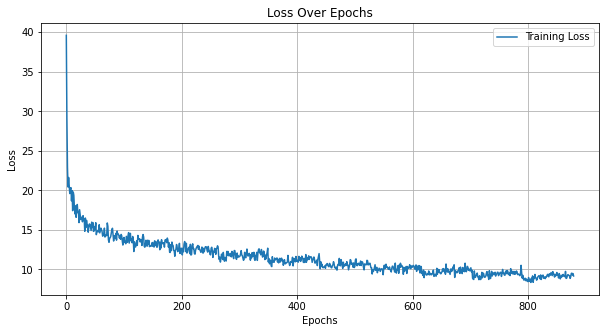

In [23]:
ALPHABET_SIZE = 27  
EMBED_DIM = 128
HIDDEN_SIZE = 256 
NUM_LAYERS = 1    
model = autocompleteModel(ALPHABET_SIZE, EMBED_DIM, HIDDEN_SIZE, NUM_LAYERS)
model.trainModel(vocab, epochs=10, batch_size=100)

In [27]:
print(model.autocomplete(["univ", "math", "neur", "engin"]))

['universite___', 'mathoritories', 'neurals______', 'engineer_____']


**For 20 epochs**

Epoch: 1, loss: 16.194067987528715
Epoch: 2, loss: 13.439147168939764
Epoch: 3, loss: 12.467358166521246
Epoch: 4, loss: 11.7306461984461
Epoch: 5, loss: 11.09477920965715
Epoch: 6, loss: 10.569205685095353
Epoch: 7, loss: 10.103240598331798
Epoch: 8, loss: 9.728375673294067
Epoch: 9, loss: 9.363703738559376
Epoch: 10, loss: 9.119235385547984
Epoch: 11, loss: 8.844381885095077
Epoch: 12, loss: 8.65215734460137
Epoch: 13, loss: 8.435239873149179
Epoch: 14, loss: 8.300708050077612
Epoch: 15, loss: 8.167393922805786
Epoch: 16, loss: 8.056374376470393
Epoch: 17, loss: 7.959193500605497
Epoch: 18, loss: 7.868967847390608
Epoch: 19, loss: 7.789412319660187
Epoch: 20, loss: 7.747157828374342


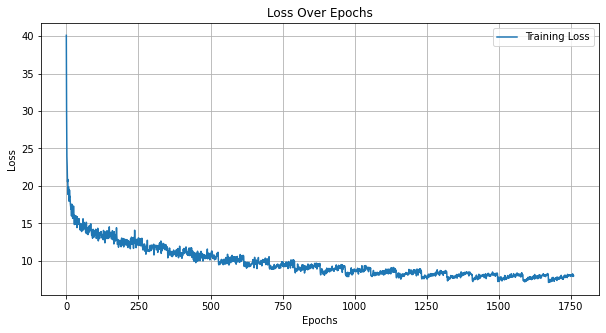

In [29]:
ALPHABET_SIZE = 27  
EMBED_DIM = 128
HIDDEN_SIZE = 256 
NUM_LAYERS = 1    
model = autocompleteModel(ALPHABET_SIZE, EMBED_DIM, HIDDEN_SIZE, NUM_LAYERS)
model.trainModel(vocab, epochs=20, batch_size=100)

In [33]:
print(model.autocomplete(["univ", "math", "neur", "engin"]))

['universal____', 'mathematices_', 'neural_______', 'engine_______']


**got accurate results finally**

<span style="color:darkblue;">

### Suggestions to Improve the Model:

**1. Increase Model Capacity:**

- **Hidden Size & Layers**: Increasing the hidden size or number of layers in the LSTM will allow the model to capture more complex dependencies and patterns in the input sequences.
- **Embedding Size**: A larger embedding size can help the model capture more detailed semantic information about each character, potentially improving the generation of meaningful substrings.

**2. Longer Training Time:**

- **More Epochs**: If the model hasn't seen enough data or trained for long enough, increasing the number of epochs or training iterations might lead to better performance.


**3. Increase Dataset Size:**

- **More Data**: Increasing the size of the dataset (vocabulary) can expose the model to more character sequences and patterns, improving its ability to generalize.


**4. Regularization Techniques:**
    
- **Weight Decay**: Add weight decay in the Adam optimizer to further regularize and prevent overfitting.

</span>
